 - Exploratory Data Analysis

 we are going to be Performing Exploratory Data Analysis Using Python, R and Weka.



## Task 1:

Run this cell by default to load the dataset.

The data contains intakes and outcomes of animals entering the Animal Center from the beginning of October 2013 to the present day.

In [306]:
# Loading the graphics package and readr package
library(graphics)
library(readr)
# Read the Animal center intakes CSV file
animal_data <- read.csv("/content/sample_data/Animal_Center_Intakes.csv")

# Displaying first few rows of CSV file
head(animal_data)

,Animal.ID,Name,DateTime,MonthYear,Found.Location,Intake.Type,Intake.Condition,Animal.Type,Sex.upon.Intake,Age.upon.Intake,Breed,Color
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A786884,*Brock,01-03-2019 16:19,01-03-2019 16:19,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
2,A706918,Belle,07-05-2015 12:59,07-05-2015 12:59,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
3,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,A665644,,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
5,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
6,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


### Task 1A:
Display all the details about the dataset

In [307]:
# Print information about the data frame
str(animal_data)

'data.frame':	124120 obs. of  12 variables:
 $ Animal.ID       : chr  "A786884" "A706918" "A724273" "A665644" ...
 $ Name            : chr  "*Brock" "Belle" "Runster" "" ...
 $ DateTime        : chr  "01-03-2019 16:19" "07-05-2015 12:59" "04/14/2016 06:43:00 PM" "10/21/2013 07:59:00 AM" ...
 $ MonthYear       : chr  "01-03-2019 16:19" "07-05-2015 12:59" "04/14/2016 06:43:00 PM" "10/21/2013 07:59:00 AM" ...
 $ Found.Location  : chr  "2501 Magin Meadow Dr in Austin (TX)" "9409 Bluegrass Dr in Austin (TX)" "2818 Palomino Trail in Austin (TX)" "Austin (TX)" ...
 $ Intake.Type     : chr  "Stray" "Stray" "Stray" "Stray" ...
 $ Intake.Condition: chr  "Normal" "Normal" "Normal" "Sick" ...
 $ Animal.Type     : chr  "Dog" "Dog" "Dog" "Cat" ...
 $ Sex.upon.Intake : chr  "Neutered Male" "Spayed Female" "Intact Male" "Intact Female" ...
 $ Age.upon.Intake : chr  "2 years" "8 years" "11 months" "4 weeks" ...
 $ Breed           : chr  "Beagle Mix" "English Springer Spaniel" "Basenji Mix" "Domestic Sh

In [308]:
#code to display to numeric stats for the given dataset
summary(animal_data)

  Animal.ID             Name             DateTime          MonthYear        
 Length:124120      Length:124120      Length:124120      Length:124120     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Found.Location     Intake.Type        Intake.Condition   Animal.Type       
 Length:124120      Length:124120      Length:124120      Length:124120     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Sex.upon.Intake    Age.upon.Intake       Breed              Color          
 Length:124120      Length:124120      Length:124120      Length:124120     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

### Task 1B:
1. Check for null values within each column.
2. Fill the values for more than 100 missing columns with certain label such as Not available, Not Name, etc. Drop the rows for the rest missing columns.
3. Convert the date columns into appropriate type.

In [309]:
# Function to count null values
count_nulls <- function(column) {
  sum(is.na(column) | column == "" | column == "NULL")
}

# Count null values in all columns
null_counts <- sapply(animal_data, count_nulls)

# Print the counts of missing values for all columns
print(null_counts)


       Animal.ID             Name         DateTime        MonthYear 
               0            39051                0                0 
  Found.Location      Intake.Type Intake.Condition      Animal.Type 
               0                0                0                0 
 Sex.upon.Intake  Age.upon.Intake            Breed            Color 
               1                0                0                0 


In [310]:

# Threshold for identifying columns to be filled
missing_threshold <- 100

# Function to replace NA, "NULL," and blanks with "Not Available"
replace_missing_values <- function(x) {
  ifelse(is.na(x) | x == "NULL" | x == "", "Not Available", x)
}

# Iterate through columns
#Replace missing values to replace missing value with Not Available if count of missing values is greater than 100 else drop those values
for (col_name in names(animal_data)) {
  col_missing_count <- sum(is.na(animal_data[[col_name]]) | animal_data[[col_name]] == "NULL" | animal_data[[col_name]] == "")

  if (col_missing_count > missing_threshold) {
    animal_data[[col_name]] <- replace_missing_values(animal_data[[col_name]])
  } else if (col_missing_count > 0 && col_missing_count <= missing_threshold) {
    animal_data <- animal_data[!(is.na(animal_data[[col_name]]) | animal_data[[col_name]] == "NULL" | animal_data[[col_name]] == ""), ]
  }
}

head(animal_data)


,Animal.ID,Name,DateTime,MonthYear,Found.Location,Intake.Type,Intake.Condition,Animal.Type,Sex.upon.Intake,Age.upon.Intake,Breed,Color
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A786884,*Brock,01-03-2019 16:19,01-03-2019 16:19,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
2,A706918,Belle,07-05-2015 12:59,07-05-2015 12:59,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
3,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,A665644,Not Available,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
5,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
6,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


In [311]:
# Count null values in all columns
null_counts <- sapply(animal_data, count_nulls)
# displays missing values count in each column
print(null_counts)

       Animal.ID             Name         DateTime        MonthYear 
               0                0                0                0 
  Found.Location      Intake.Type Intake.Condition      Animal.Type 
               0                0                0                0 
 Sex.upon.Intake  Age.upon.Intake            Breed            Color 
               0                0                0                0 


In [312]:
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyverse)
# v is used as mediator to convert DateTime and MonthYear to appropriate format
v <- parse_date_time(animal_data$DateTime, c('%m-%d-%Y %H:%M', '"%m/%d/%Y %I:%M:%S %p"'))
v[is.na(v)] <- as.POSIXct(as.Date(as.numeric(animal_data$DateTime[is.na(v)])))
animal_data$DateTime <- v

v <- parse_date_time(animal_data$MonthYear, c('%m-%d-%Y %H:%M', '"%m/%d/%Y %I:%M:%S %p"'))
v[is.na(v)] <- as.POSIXct(as.Date(as.numeric(animal_data$MonthYear[is.na(v)])))
animal_data$MonthYear <- v

head(animal_data)

,Animal.ID,Name,DateTime,MonthYear,Found.Location,Intake.Type,Intake.Condition,Animal.Type,Sex.upon.Intake,Age.upon.Intake,Breed,Color
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A786884,*Brock,2019-01-03 16:19:00,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
2,A706918,Belle,2015-07-05 12:59:00,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
3,A724273,Runster,2016-04-14 18:43:00,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,A665644,Not Available,2013-10-21 07:59:00,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
5,A682524,Rio,2014-06-29 10:38:00,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
6,A743852,Odin,2017-02-18 12:46:00,2017-02-18 12:46:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


In [313]:
# we can observe the type of columns DateTime and MonthYear is changed
str(animal_data)

'data.frame':	124119 obs. of  12 variables:
 $ Animal.ID       : chr  "A786884" "A706918" "A724273" "A665644" ...
 $ Name            : chr  "*Brock" "Belle" "Runster" "Not Available" ...
 $ DateTime        : POSIXct, format: "2019-01-03 16:19:00" "2015-07-05 12:59:00" ...
 $ MonthYear       : POSIXct, format: "2019-01-03 16:19:00" "2015-07-05 12:59:00" ...
 $ Found.Location  : chr  "2501 Magin Meadow Dr in Austin (TX)" "9409 Bluegrass Dr in Austin (TX)" "2818 Palomino Trail in Austin (TX)" "Austin (TX)" ...
 $ Intake.Type     : chr  "Stray" "Stray" "Stray" "Stray" ...
 $ Intake.Condition: chr  "Normal" "Normal" "Normal" "Sick" ...
 $ Animal.Type     : chr  "Dog" "Dog" "Dog" "Cat" ...
 $ Sex.upon.Intake : chr  "Neutered Male" "Spayed Female" "Intact Male" "Intact Female" ...
 $ Age.upon.Intake : chr  "2 years" "8 years" "11 months" "4 weeks" ...
 $ Breed           : chr  "Beagle Mix" "English Springer Spaniel" "Basenji Mix" "Domestic Shorthair Mix" ...
 $ Color           : chr  "Tricolo

### Task 1C: 
1. Plot the Age Intake column and observe the distribution.
2. Group certain values into categories,
- Less than 1 week, Less than 1 month, Less than 1 year
- Drop inappropriate negative valued years rows.
3. Plot the Column to again see the new distributuions.

Tip: consider 0 years as less than 1 year.

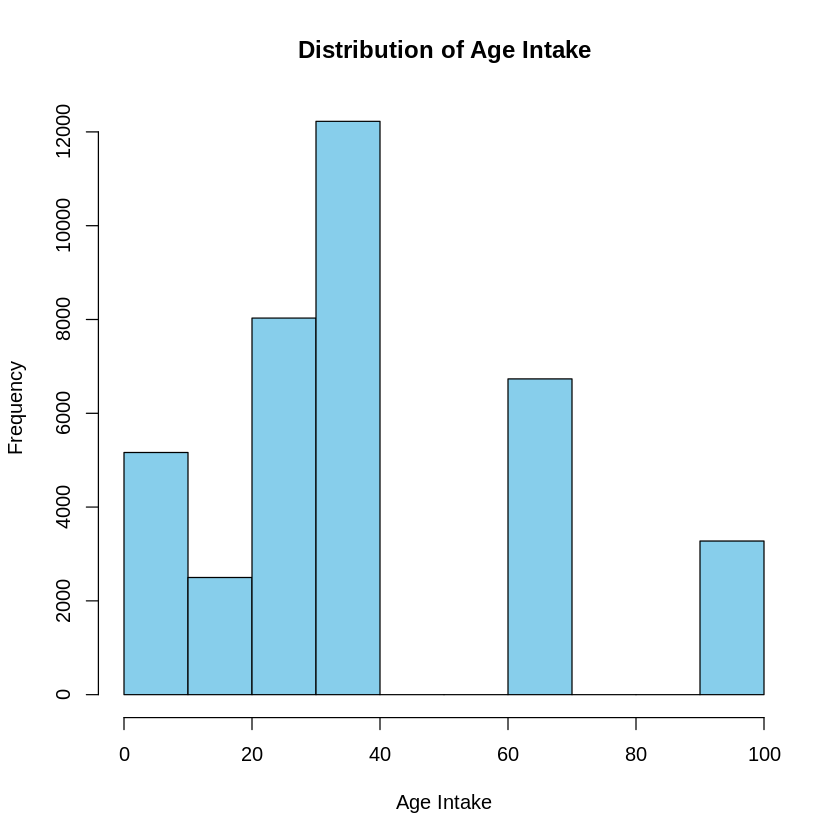

In [314]:
library(lubridate)
#removing negative values
animal_data_1 <- subset(animal_data, !grepl("^-[0-9]+ years$", Age.upon.Intake))

# Convert the 'Age upon Intake' column to a numerical format
animal_data_1$Age.upon.Intake.days <- as.duration(animal_data_1$Age.upon.Intake)
animal_data_1$Age.upon.Intake.days <- as.numeric(animal_data_1$Age.upon.Intake.days)
animal_data_1$Age.upon.Intake.days <- animal_data_1$Age.upon.Intake.days / 86400


# Filter out negative and extreme values (ages above 100)
animal_data_1 <- animal_data_1[animal_data_1$Age.upon.Intake.days >= 0 & animal_data_1$Age.upon.Intake.days <= 100, ]

# Create a histogram to observe the distribution of the 'Age Intake' column
hist(animal_data_1$Age.upon.Intake.days,
     main = "Distribution of Age Intake",
     xlab = "Age Intake",
     ylab = "Frequency",
     col = "skyblue",
     border = "black",
     breaks = 10)


In [315]:

# Load the 'dplyr' library
library(dplyr)

# Define a custom function to categorize the age
categorize_age <- function(age_str) {
  tryCatch({
    # Split the age string into numeric value and unit
    age_parts <- strsplit(age_str, " ")[[1]]
    age <- as.integer(age_parts[1])
    unit <- tolower(age_parts[2])

    # Convert all units to days for consistent comparison
    if (unit == "year" || unit == "years") {
      age_in_days <- age * 365
    } else if (unit == "month" || unit == "months") {
      age_in_days <- age * 30
    } else if (unit == "week" || unit == "weeks") {
      age_in_days <- age * 7
    } else if (unit == "day" || unit == "days") {
      age_in_days <- age
    } else {
      return(NULL)
    }

    if (age_in_days < 0) {
      return(NULL)  # Exclude negative values
    } else if (age_in_days < 7) {
      return("Less than 1 week")
    } else if (age_in_days < 30) {
      return("Less than 1 month")
    } else {
      return("Less than 1 year")
    }
  }, error = function(e) {
    return(NULL)  # Handle non-numeric or improperly formatted values
  })
}

# Apply the custom age categorization function to the 'Age_upon_Intake' column
animal_data_1 <- animal_data_1 %>%
  mutate(Age.Category = sapply(Age.upon.Intake, categorize_age))


In [316]:
# categories for Age Upon Intake
unique_categories <- unique(animal_data_1$Age.Category)
print(unique_categories)

[1] "Less than 1 month" "Less than 1 year"  "Less than 1 week" 


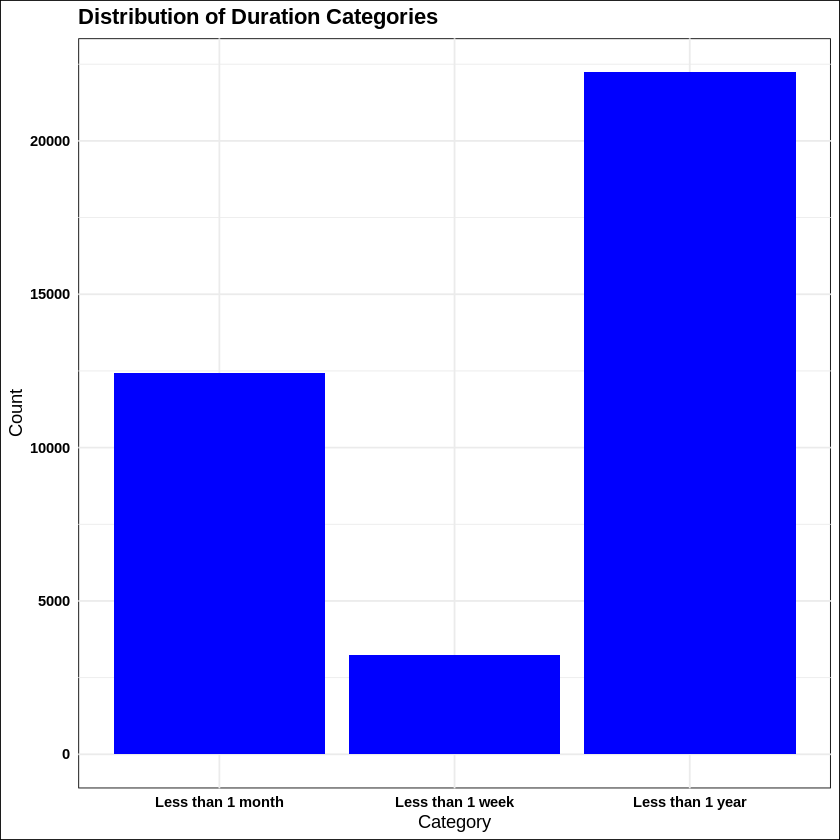

In [317]:
library(ggplot2)

# storing data in filtered_data
filtered_data <- animal_data_1

# Create the bar plot with modified colors
ggplot(filtered_data, aes(x = Age.Category)) +
  geom_bar(fill = 'blue') +
  labs(title = 'Distribution of Duration Categories', x = 'Category', y = 'Count') +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = 'white'),
    plot.background = element_rect(fill = 'white'),
    axis.text.x = element_text(color = 'black', face = 'bold'),
    axis.text.y = element_text(color = 'black', face = 'bold'),
    plot.title = element_text(color = 'black', face = 'bold')
  )


### Task 1D:
Print Top 15 locations where animals were found.

In [318]:
# table() is used to count occurrences of each unique location
found_location_counts <- table(animal_data$Found.Location)
# to get the top 15 locations
top_15_locations <- head(sort(found_location_counts, decreasing = TRUE), 15)

# Create a data frame with two columns
top_locations_df <- data.frame(
  "Location" = names(top_15_locations),
  "Count" = as.numeric(top_15_locations)
)

# Print the data frame
print(top_locations_df)


                                Location Count
1                            Austin (TX) 22859
2                            Travis (TX)  1995
3                   Outside Jurisdiction  1529
4      7201 Levander Loop in Austin (TX)   811
5                             Manor (TX)   620
6                      Pflugerville (TX)   607
7                         Del Valle (TX)   527
8       4434 Frontier Trl in Austin (TX)   208
9       124 W Anderson Ln in Austin (TX)   192
10    4434 Frontier Trail in Austin (TX)   158
11                          Leander (TX)   157
12    1156 W Cesar Chavez in Austin (TX)   146
13 124 West Anderson Lane in Austin (TX)   139
14    12034 Research Blvd in Austin (TX)   136
15         12034 Research in Austin (TX)   113


In [319]:
head(animal_data)

,Animal.ID,Name,DateTime,MonthYear,Found.Location,Intake.Type,Intake.Condition,Animal.Type,Sex.upon.Intake,Age.upon.Intake,Breed,Color
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A786884,*Brock,2019-01-03 16:19:00,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
2,A706918,Belle,2015-07-05 12:59:00,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
3,A724273,Runster,2016-04-14 18:43:00,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,A665644,Not Available,2013-10-21 07:59:00,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
5,A682524,Rio,2014-06-29 10:38:00,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
6,A743852,Odin,2017-02-18 12:46:00,2017-02-18 12:46:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


### Task 1E: 
Print Top 10 breeds with animal type that were stray and were found in between 15 to 20 years old.

In [320]:
# Load the dplyr package
library(dplyr)

# Filter the DataFrame for animals that are "stray" and found between 15 and 20 years old
filtered_df <- animal_data %>%
  filter(Intake.Type == 'Stray' & grepl('1[5-9] years|20 years', Age.upon.Intake))

# Count the occurrences of each breed
breed_counts <- table(filtered_df$Breed)

# Sort in descending order and select the top 10 breeds
top_breeds <- head(sort(breed_counts, decreasing = TRUE), 10)

# Display the top 10 breeds in a formatted table
print(top_breeds)



  Domestic Shorthair Mix  Chihuahua Shorthair Mix   Labrador Retriever Mix 
                      63                       53                       15 
   Domestic Longhair Mix      Chihuahua Shorthair       Domestic Shorthair 
                      13                       12                       12 
Domestic Medium Hair Mix             Pit Bull Mix          Rat Terrier Mix 
                      11                       10                       10 
     German Shepherd Mix 
                       9 


### Task 1F: 
Display horizontal bar graph for Top 10 Locations where animals were found at night time that were sick.

Note: night time = 7pm to 12am

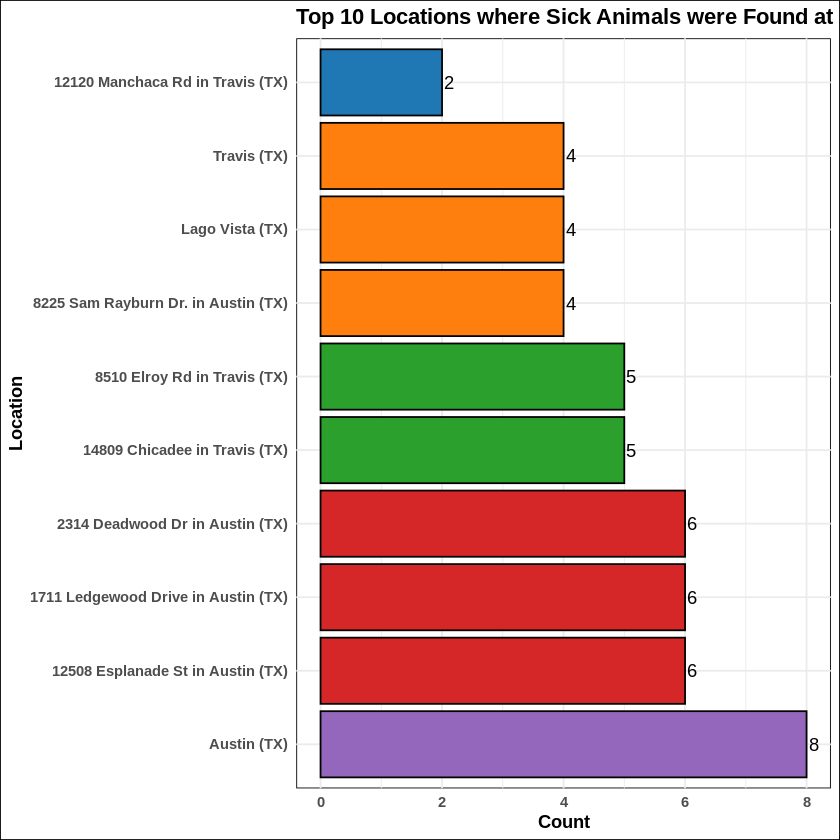

In [339]:
# Load required libraries
library(dplyr)
library(ggplot2)

# Convert 'DateTime' column to datetime format
animal_data$DateTime <- as.POSIXct(animal_data$DateTime)

# Define night time range
night_time_start <- as.POSIXct("19:00:00", format = "%H:%M:%S")
night_time_end <- as.POSIXct("00:00:00", format = "%H:%M:%S")

# Filter the DataFrame for animals found at night time and classified as sick
sick_animals_at_night <- animal_data %>%
  filter(hour(DateTime) >= 19,
         Intake.Condition == 'Sick')

# Count occurrences of each unique location
location_counts <- sick_animals_at_night %>%
  count(Found.Location) %>%
  arrange(desc(n)) %>%
  head(10)

# Create a custom color palette for the bars
custom_colors <- c('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#bcbd22', '#17becf', '#636363')

# Create the horizontal bar plot with modified colors and text settings
ggplot(location_counts, aes(x = n, y = reorder(Found.Location, -n), fill = factor(n), label = n)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = custom_colors) +
  labs(title = "Top 10 Locations where Sick Animals were Found at Night Time",
       x = "Count", y = "Location") +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "white"),  # White background
        panel.background = element_rect(fill = "white"),  # White background
        text = element_text(color = "black", face = "bold"),  # Black, bold text
        legend.position = "none") +
  geom_text(hjust = -0.2)


### Task 1G: 

Display a pie chart for cat conditions when they were found at '4434 Frontier Trl in Austin (TX)'.

In [322]:


# Filter the DataFrame for cats found at '4434 Frontier Trl in Austin (TX)'
cats_at_location <- animal_data %>%
  filter(Found.Location == '4434 Frontier Trl in Austin (TX)' & Animal.Type == 'Cat')

# To Get unique conditions
unique_conditions <- unique(cats_at_location$Intake.Condition)

# Printing the unique conditions
cat("Unique Cat Conditions at 4434 Frontier Trl in Austin (TX):\n")
for (condition in unique_conditions) {
  cat(condition, "\n")
}


Unique Cat Conditions at 4434 Frontier Trl in Austin (TX):
Nursing 
Injured 
Normal 
Sick 
Other 


In [323]:
# Load required libraries
library(dplyr)
install.packages("plotly")
library(plotly)
install.packages("ggplot2")
install.packages("graphics")
library(graphics)
library(stats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘graphics’ is a base package, and should not be updated”


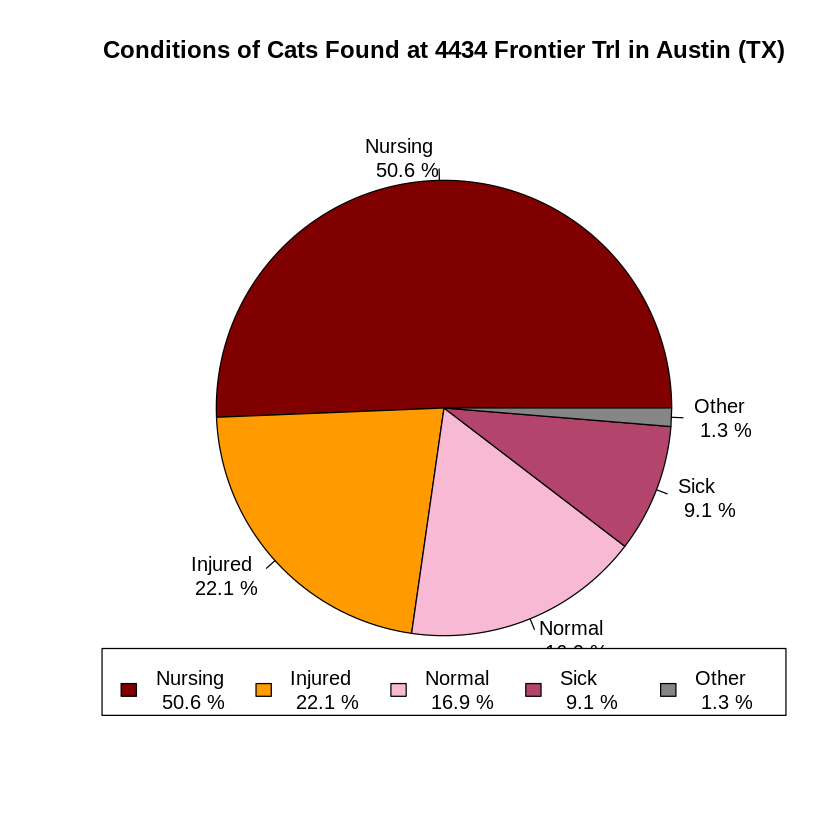

In [325]:
# Filter for cats at the specified location
cats_at_location <- subset(animal_data, Animal.Type == "Cat" & Found.Location == "4434 Frontier Trl in Austin (TX)")

# Count the conditions of the cats
condition_counts <- table(cats_at_location$Intake.Condition)

# defining the custom colors
custom_colors <- c('#800000', '#ff9a00', '#f8b9d4', '#b3446c', '#868686')

# To Create a pie chart using base R with custom colors
pie_data <- as.data.frame(condition_counts)
colnames(pie_data) <- c("Condition", "Count")

# Ordering the slices by count (descending order)
pie_data <- pie_data[order(pie_data$Count, decreasing = TRUE), ]

# To Calculate percentages
pie_data$Percent <- round(100 * pie_data$Count / sum(pie_data$Count), 1)

# Creating the pie chart with custom colors
pie_chart <- pie(pie_data$Count, labels = paste(pie_data$Condition, "\n", pie_data$Percent, "%"), col = custom_colors)

# Adding a title
title("Conditions of Cats Found at 4434 Frontier Trl in Austin (TX)")

# Adding a legend
legend("bottom", legend = paste(pie_data$Condition, "\n", pie_data$Percent, "%"), fill = custom_colors, horiz = TRUE)


### Task 1H:
Display a bar chart for Top 10 colors of animal that were surrendered.

In [326]:
head(animal_data)


,Animal.ID,Name,DateTime,MonthYear,Found.Location,Intake.Type,Intake.Condition,Animal.Type,Sex.upon.Intake,Age.upon.Intake,Breed,Color
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A786884,*Brock,2019-01-03 16:19:00,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
2,A706918,Belle,2015-07-05 12:59:00,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
3,A724273,Runster,2016-04-14 18:43:00,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,A665644,Not Available,2013-10-21 07:59:00,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
5,A682524,Rio,2014-06-29 10:38:00,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
6,A743852,Odin,2017-02-18 12:46:00,2017-02-18 12:46:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


In [327]:
# Finding unique values in the 'Intake Type' column
unique_intake_types <- unique(animal_data$Intake.Type)

# Printing unique intake types
print(unique_intake_types)


[1] "Stray"              "Owner Surrender"    "Public Assist"     
[4] "Wildlife"           "Euthanasia Request" "Abandoned"         


In [328]:
# To Load the required libraries
library(dplyr)

# Filtering for 'Owner Surrender' in 'Intake Type' column (ignoring leading/trailing spaces)
surrendered_animals <- animal_data %>%
  filter(trimws(Intake.Type) == 'Owner Surrender')
head(surrendered_animals)


,Animal.ID,Name,DateTime,MonthYear,Found.Location,Intake.Type,Intake.Condition,Animal.Type,Sex.upon.Intake,Age.upon.Intake,Breed,Color
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A743852,Odin,2017-02-18 12:46:00,2017-02-18 12:46:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate
2,A731435,*Casey,2016-08-08 17:52:00,2016-08-08 17:52:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Cream Tabby
3,A657188,Tommy,2013-11-10 17:19:00,2013-11-10 17:19:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,14 years,Domestic Shorthair Mix,Brown Tabby/White
4,A754715,Rheia,2019-07-29 17:19:00,2019-07-29 17:19:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,Labrador Retriever Mix,Black/White
5,A696205,Roo,2015-02-12 11:57:00,2015-02-12 11:57:00,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Black
6,A794334,Pearl,2019-09-02 11:52:00,2019-09-02 11:52:00,Outside Jurisdiction,Owner Surrender,Sick,Dog,Spayed Female,3 years,Boxer Mix,White


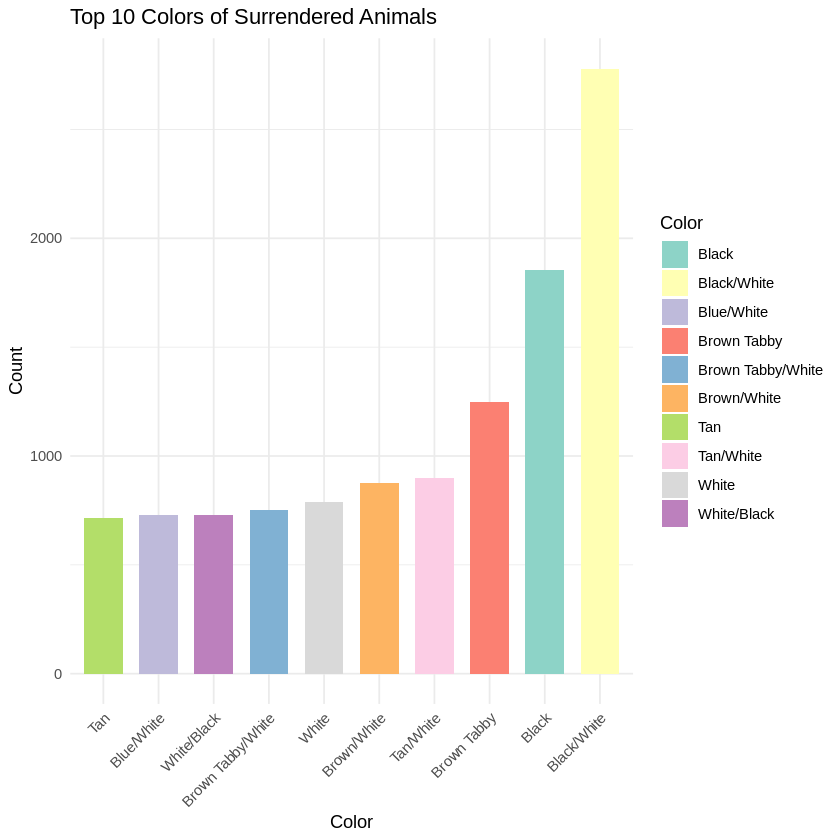

In [329]:
#Loading Library
library(ggplot2)


# To Get the top 10 colors of surrendered animals
top_colors <- head(sort(table(surrendered_animals$Color), decreasing = TRUE), 10)

# Checking if there is data to plot
if (length(top_colors) > 0) {
  # To Create a bar chart using ggplot2
  bar_data <- data.frame(Color = names(top_colors), Count = as.numeric(top_colors))
  bar_chart <- ggplot(bar_data, aes(x = reorder(Color, Count), y = Count, fill = Color)) +
    geom_bar(stat = "identity", width = 0.7) +
    labs(x = "Color", y = "Count", title = "Top 10 Colors of Surrendered Animals") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_fill_brewer(palette = "Set3")  # Choose a color palette as needed

  # Displaying the bar chart
  print(bar_chart)
} else {
  cat("No data to plot for surrendered animals.\n")
}


### Task 1I: 

Display a 2 by 2 graphs where spots are defined as
1. Pie chart for intake type.
2. Pie chart for Intake Condition
3. Pie chart for Animal Type.
4. Horizontal Distribution for Intake condition for Dogs.

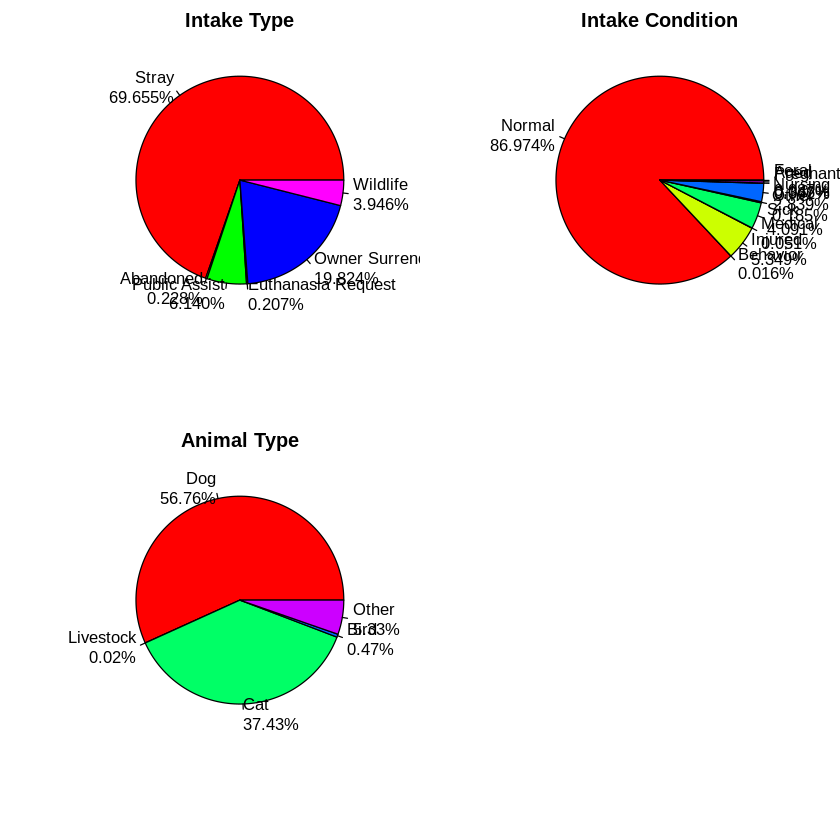

In [330]:
# To Load the ggplot2 library
library(ggplot2)

# Create a 2x2 grid of subplots with a larger figure size
par(mfrow=c(2, 2), mar=c(5, 5, 2, 2))

# Function to customize the order of slices
customize_pie_chart_order <- function(data_series, custom_order) {
  data_sorted <- data_series[match(custom_order, names(data_series))]
  return(data_sorted)
}


# Plot 1: Pie chart for Intake Type (customized order)
intake_type_counts <- table(animal_data$Intake.Type)
custom_order1 <- c('Stray', 'Abandoned', 'Public Assist', 'Euthanasia Request', 'Owner Surrender', 'Wildlife')
intake_type_counts_custom <- customize_pie_chart_order(intake_type_counts, custom_order1)

# Convert to numeric vector before using scales::percent
intake_type_percent <- scales::percent(as.numeric(intake_type_counts_custom) / sum(intake_type_counts_custom))
labels1 <- paste(custom_order1, "\n", intake_type_percent, sep = "")
pie(intake_type_counts_custom, labels = labels1, main = "Intake Type", col = rainbow(length(intake_type_counts_custom)))


# Plot 2: Pie chart for Intake Condition (customized order)
intake_condition_counts <- table(animal_data$Intake.Condition)
custom_order2 <- c('Normal', 'Behavior', 'Injured', 'Medical', 'Sick', 'Other', 'Nursing', 'Pregnant', 'Aged', 'Feral')
intake_condition_counts_custom <- customize_pie_chart_order(intake_condition_counts, custom_order2)

# Convert to numeric vector before using scales::percent
intake_condition_percent <- scales::percent(as.numeric(intake_condition_counts_custom) / sum(intake_condition_counts_custom))
labels2 <- paste(custom_order2, "\n", intake_condition_percent, sep = "")
pie(intake_condition_counts_custom, labels = labels2, main = "Intake Condition", col = rainbow(length(intake_condition_counts_custom)))

# Plot 3: Pie chart for Animal Type (customized order)
animal_type_counts <- table(animal_data$Animal.Type)
custom_order3 <- c('Dog', 'Livestock', 'Cat', 'Bird', 'Other')
animal_type_counts_custom <- customize_pie_chart_order(animal_type_counts, custom_order3)

# Convert to numeric vector before using scales::percent
animal_type_percent <- scales::percent(as.numeric(animal_type_counts_custom) / sum(animal_type_counts_custom))
labels3 <- paste(custom_order3, "\n", animal_type_percent, sep = "")
pie(animal_type_counts_custom, labels = labels3, main = "Animal Type", col = rainbow(length(animal_type_counts_custom)))







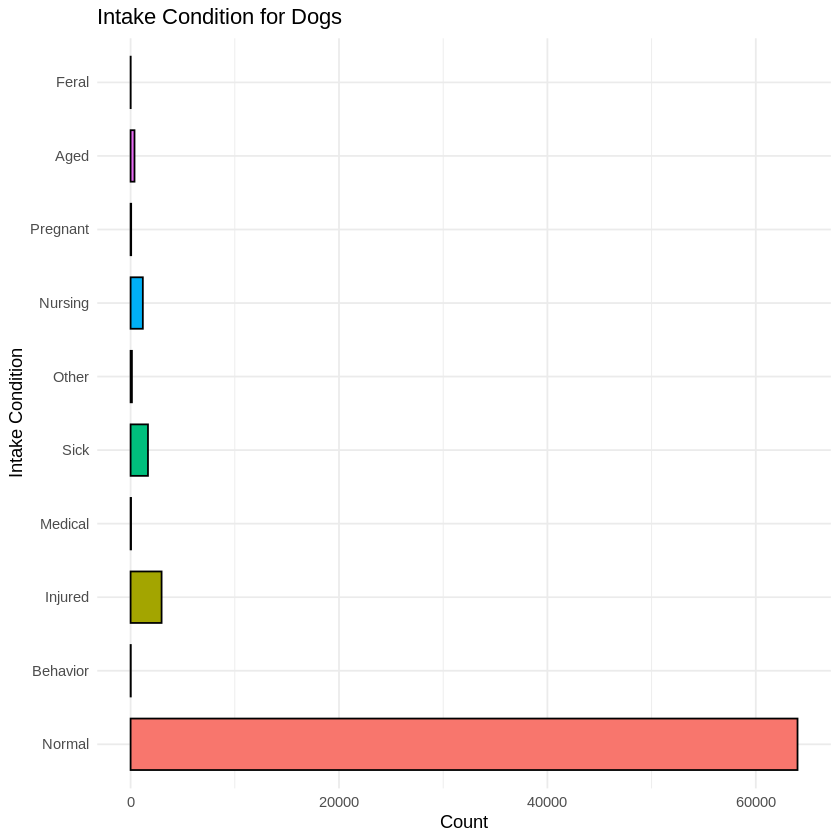

In [341]:
# Plot 4: Horizontal Distribution for Intake Condition for Dogs
# Load the necessary libraries
library(dplyr)
library(ggplot2)

# To Filter the data for 'Animal Type' == 'Dog'
dogs_df <- subset(animal_data, Animal.Type == 'Dog')
intake_condition_dogs_counts <- table(dogs_df$Intake.Condition)
custom_order4 = c('Normal', 'Behavior', 'Injured', 'Medical', 'Sick', 'Other', 'Nursing', 'Pregnant', 'Aged', 'Feral')
# To Create a data frame for plotting
plot_data <- data.frame(
  Intake.Condition = factor(names(intake_condition_dogs_counts), levels = custom_order4),
  Count = as.numeric(intake_condition_dogs_counts)
)

# To Create the horizontal bar plot with custom Y-axis labels
ggplot(plot_data, aes(x = Count, y = Intake.Condition, fill = Intake.Condition)) +
  geom_bar(stat = "identity", color = "black", width = 0.7) +
  labs(x = "Count", y = "Intake Condition", title = "Intake Condition for Dogs") +
  theme_minimal() +
  theme(legend.position = "none")

To Represent these Charts in Better Way

In [332]:
#Loading necessary libraries
install.packages("gridExtra")
library(gridExtra)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Don't know how to automatically pick scale for object of type <table>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <table>.
Defaulting to continuous.


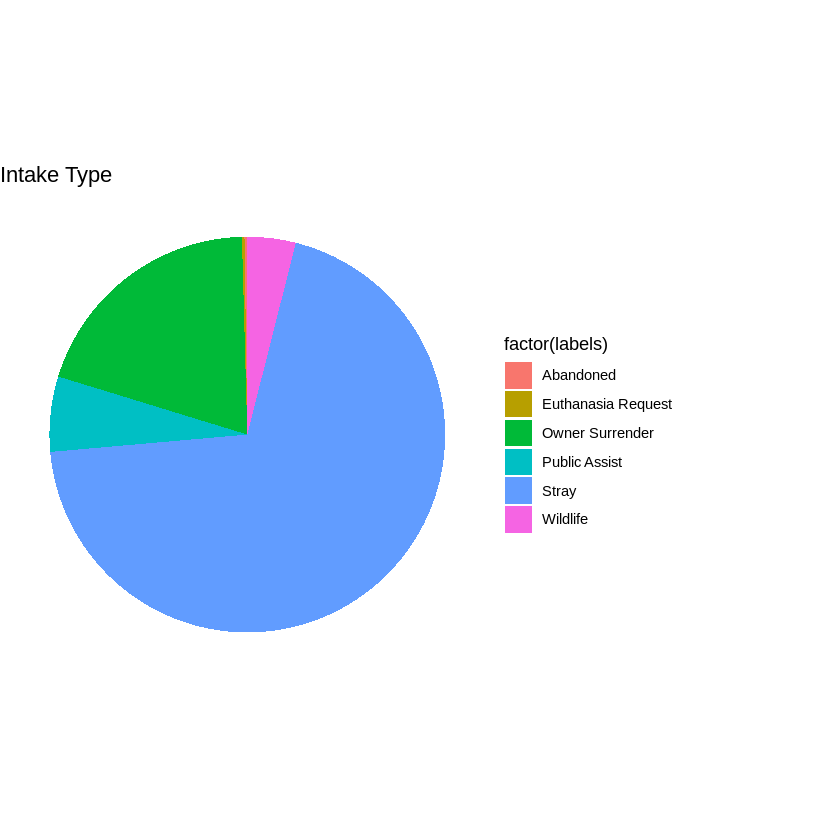

Don't know how to automatically pick scale for object of type <table>.
Defaulting to continuous.


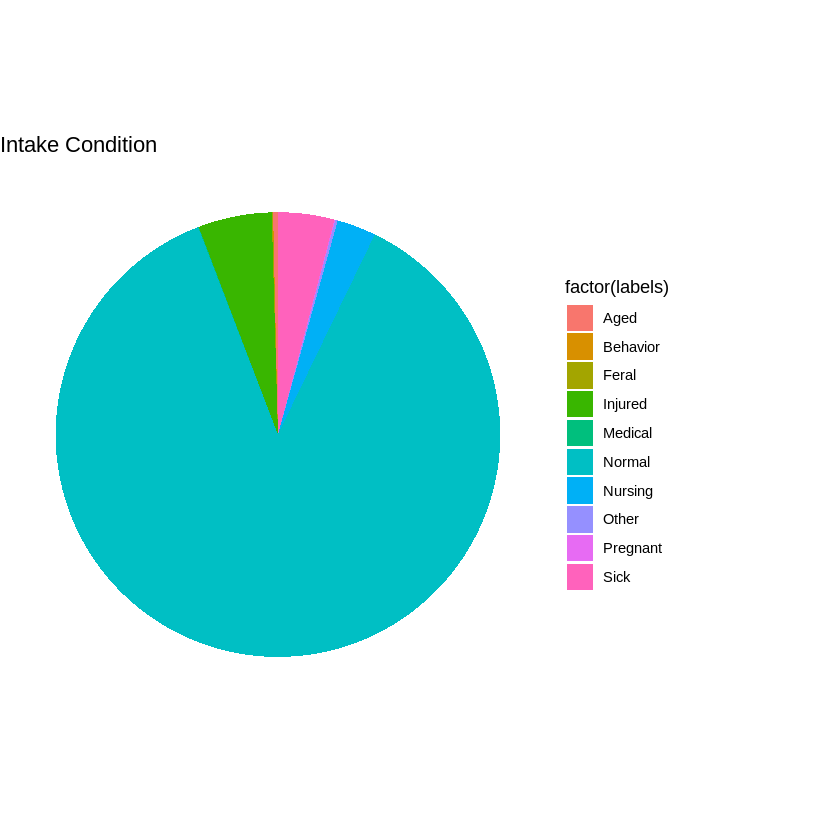

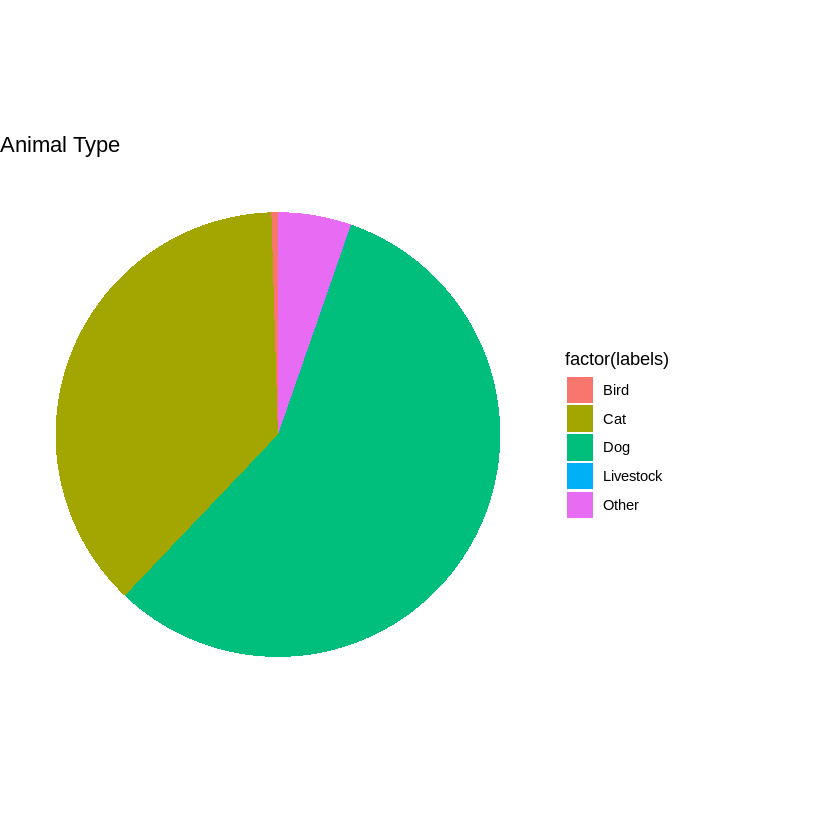

In [333]:
# Create a 2x2 grid of subplots with a larger figure size
par(mfrow=c(2, 2), mar=c(5, 5, 2, 2))

# Function to customize the order of slices
customize_pie_chart_order <- function(data_series, custom_order) {
  data_sorted <- data_series[match(custom_order, names(data_series))]
  return(data_sorted)
}

# Function to create a pie chart with a legend beside it
create_pie_chart_with_legend <- function(data, labels, title) {
  p <- ggplot(data = NULL, aes(x = factor(1), y = data, fill = factor(labels))) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    theme_void() +
    ggtitle(title)

  # Create the legend
  legend <- labs(fill = "Legend") +
    scale_fill_discrete(labels = paste(labels, scales::percent(as.numeric(data) / sum(data))))

  # To Arrange the plot and legend side by side
  grid.arrange(p, legend, ncol = 2, widths = c(4, 1))
}

# Plot 1: Pie chart for Intake Type (customized order)
intake_type_counts <- table(animal_data$Intake.Type)
custom_order1 <- c('Stray', 'Abandoned', 'Public Assist', 'Euthanasia Request', 'Owner Surrender', 'Wildlife')
intake_type_counts_custom <- customize_pie_chart_order(intake_type_counts, custom_order1)

create_pie_chart_with_legend(intake_type_counts_custom, custom_order1, "Intake Type")

# Repeat the same approach for the other pie charts (Plot 2 and Plot 3)

# Plot 2: Pie chart for Intake Condition (customized order)
intake_condition_counts <- table(animal_data$Intake.Condition)
custom_order2 <- c('Normal', 'Behavior', 'Injured', 'Medical', 'Sick', 'Other', 'Nursing', 'Pregnant', 'Aged', 'Feral')
intake_condition_counts_custom <- customize_pie_chart_order(intake_condition_counts, custom_order2)

create_pie_chart_with_legend(intake_condition_counts_custom, custom_order2, "Intake Condition")

# Plot 3: Pie chart for Animal Type (customized order)
animal_type_counts <- table(animal_data$Animal.Type)
custom_order3 <- c('Dog', 'Livestock', 'Cat', 'Bird', 'Other')
animal_type_counts_custom <- customize_pie_chart_order(animal_type_counts, custom_order3)

create_pie_chart_with_legend(animal_type_counts_custom, custom_order3, "Animal Type")



### Task 1J:
Print Top 10 Breeds of animal who were less than a year old when they were taken in along with what type of animal they were.

In [334]:

# Load the 'dplyr' library
library(dplyr)

# Define a custom function to categorize the age
categorize_age <- function(age_str) {
  tryCatch({
    # Split the age string into numeric value and unit
    age_parts <- strsplit(age_str, " ")[[1]]
    age <- as.integer(age_parts[1])
    unit <- tolower(age_parts[2])

    # Convert all units to days for consistent comparison
    if (unit == "year" || unit == "years") {
      age_in_days <- age * 365
    } else if (unit == "month" || unit == "months") {
      age_in_days <- age * 30
    } else if (unit == "week" || unit == "weeks") {
      age_in_days <- age * 7
    } else if (unit == "day" || unit == "days") {
      age_in_days <- age
    } else {
      return(NULL)  # Handle unknown units
    }

    if (age_in_days < 0) {
      return(NULL)  # Exclude negative values
    } else if (age_in_days < 7) {
      return("Less than 1 week")
    } else if (age_in_days < 30) {
      return("Less than 1 month")
    } else {
      return("Less than 1 year")
    }
  }, error = function(e) {
    return(NULL)  # Handle non-numeric or improperly formatted values
  })
}

# Apply the custom age categorization function to the 'Age_upon_Intake' column
animal_data <- animal_data %>%
  mutate(Age.Category = sapply(Age.upon.Intake, categorize_age))


In [354]:
# Filtering for animals less than a year old using dplyr
young_animals <- animal_data %>%
  filter(Age.Category == "Less than 1 year")

# Grouping by Breed and Animal Type, then count the occurrences
breed_counts <- young_animals %>%
  group_by(Breed, Animal.Type) %>%
  summarise(Count = n())

# Sorting the breeds by Count in descending order
top_10_breeds <- breed_counts %>%
  arrange(desc(Count)) %>%
  head(10)

# Printing the top 10 breeds and their corresponding animal types in a table format
print(top_10_breeds)

`summarise()` has grouped output by 'Breed'. You can override using the
`.groups` argument.


# A tibble: 10 × 3
# Groups:   Breed [10]
   Breed                     Animal.Type Count
   <chr>                     <chr>       <int>
 1 Domestic Shorthair Mix    Cat         22027
 2 Pit Bull Mix              Dog          8108
 3 Labrador Retriever Mix    Dog          6457
 4 Chihuahua Shorthair Mix   Dog          5990
 5 Domestic Shorthair        Cat          5003
 6 German Shepherd Mix       Dog          2910
 7 Domestic Medium Hair Mix  Cat          2431
 8 Bat Mix                   Other        1725
 9 Australian Cattle Dog Mix Dog          1445
10 Pit Bull                  Dog          1300


### Task 1K: 
1. Print the count of distinct sex intake from 2015 to 2020.
2. Display a side by side bar graph this.

In [337]:
# To Display the count of distinct sex intake from 2015 to 2020
library(dplyr)

animal_data$DateTime <- as.POSIXct(animal_data$DateTime)

filtered_data <- animal_data %>%
  filter(year(DateTime) >= 2015 & year(DateTime) <= 2020)

sex_counts <- table(filtered_data$Sex.upon.Intake)

print(sex_counts)


Intact Female   Intact Male Neutered Male Spayed Female       Unknown 
        30738         32354         15540         13106          8505 


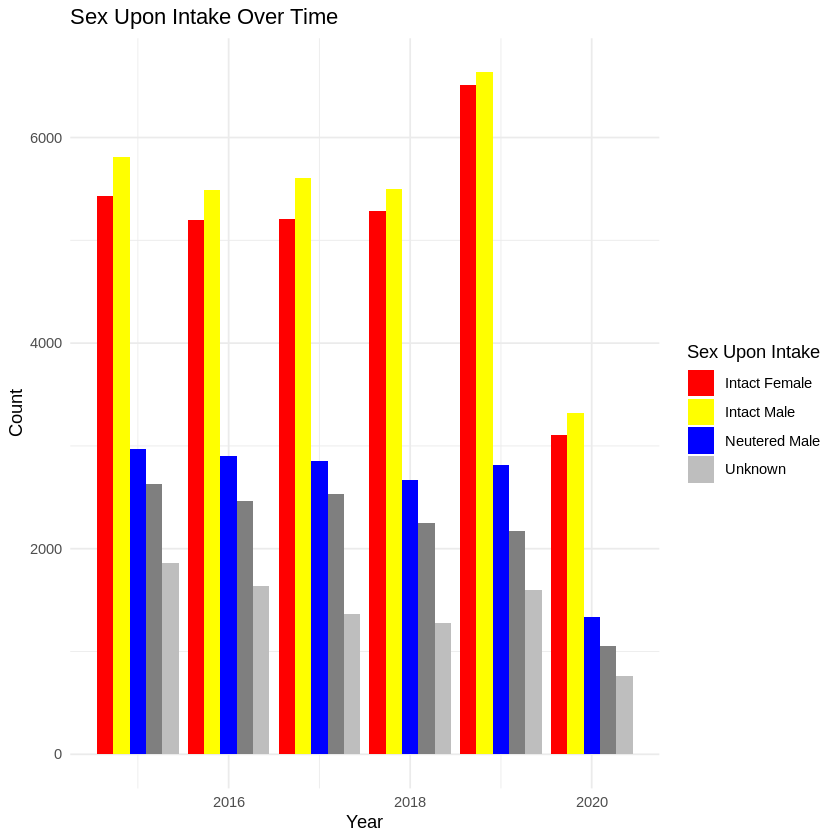

In [356]:
# Calculate counts of Sex upon Intake over the years
sex_counts <- filtered_data %>%
  group_by(Year = year(DateTime), Sex.upon.Intake) %>%
  summarise(Count = n(), .groups = "drop") %>%
  ungroup()

# Create a bar plot to visualize the data
ggplot(sex_counts, aes(x = Year, y = Count, fill = Sex.upon.Intake)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Sex Upon Intake Over Time",
       x = "Year",
       y = "Count") +
  theme_minimal() +
  scale_fill_manual(name = "Sex Upon Intake",
                    values = c("Neutered Male" = "blue",
                               "Intact Female" = "red",
                               "Intact Male" = "yellow",
                               "Unknown" = "gray"))
